In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
df_house_train = pd.read_csv('house_train.csv')
df_house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_house_train.shape

(1460, 81)

In [ ]:
df_house_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_house_train.duplicated().sum()

0

In [ ]:
df_house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_house_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_house_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df_house_train.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
df_house_train.select_dtypes(include=[np.float64, np.int64]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
object_columns = df_house_train.select_dtypes(include='object').columns
for col in object_columns:
  print(f"Análise da coluna: {col}")
  print(f"Valores assumidos:\n {df_house_train[col].value_counts()}")

Análise da coluna: MSZoning
Valores assumidos:
 MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Análise da coluna: Street
Valores assumidos:
 Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Análise da coluna: Alley
Valores assumidos:
 Alley
Grvl    50
Pave    41
Name: count, dtype: int64
Análise da coluna: LotShape
Valores assumidos:
 LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
Análise da coluna: LandContour
Valores assumidos:
 LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Análise da coluna: Utilities
Valores assumidos:
 Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
Análise da coluna: LotConfig
Valores assumidos:
 LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
Análise da coluna: LandSlope
Valores assumidos:
 LandSlope
Gtl    1382
Mod      65
Sev   

In [ ]:
df_house_train = df_house_train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType']).copy()

In [ ]:
scaler_minMax = MinMaxScaler()
numList = df_house_train.select_dtypes(include=[np.float64, np.int64]).columns

df_house_train[numList] = pd.DataFrame(scaler_minMax.fit_transform(df_house_train[numList]))
df_house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.000000,0.235294,RL,0.150685,0.033420,Pave,Reg,Lvl,AllPub,Inside,...,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,WD,Normal,0.241078
1,0.000685,0.000000,RL,0.202055,0.038795,Pave,Reg,Lvl,AllPub,FR2,...,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,WD,Normal,0.203583
2,0.001371,0.235294,RL,0.160959,0.046507,Pave,IR1,Lvl,AllPub,Inside,...,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,WD,Normal,0.261908
3,0.002056,0.294118,RL,0.133562,0.038561,Pave,IR1,Lvl,AllPub,Corner,...,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,WD,Abnorml,0.145952
4,0.002742,0.235294,RL,0.215753,0.060576,Pave,IR1,Lvl,AllPub,FR2,...,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,WD,Normal,0.298709


In [ ]:
lb = LabelEncoder()
objList = df_house_train.select_dtypes(include='object').columns
for obj in objList:
  df_house_train[obj] = lb.fit_transform(df_house_train[obj].astype(str))

df_house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.000000,0.235294,3,0.150685,0.033420,1,3,3,0,4,...,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,8,4,0.241078
1,0.000685,0.000000,3,0.202055,0.038795,1,3,3,0,2,...,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,8,4,0.203583
2,0.001371,0.235294,3,0.160959,0.046507,1,0,3,0,4,...,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,8,4,0.261908
3,0.002056,0.294118,3,0.133562,0.038561,1,0,3,0,0,...,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,8,0,0.145952
4,0.002742,0.235294,3,0.215753,0.060576,1,0,3,0,2,...,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,8,4,0.298709


In [ ]:
null_values = ['LotFrontage','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

df_house_train.fillna(df_house_train[null_values].mean(), inplace=True)

In [ ]:
df_house_train['price_reg']=None

In [ ]:
predictors = df_house_train[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]
outcome = df_house_train['SalePrice']

modelReg = LinearRegression()
modelReg.fit(predictors, outcome)

y_pred = modelReg.predict(predictors)

df_house_train['price_reg'] = y_pred
df_house_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,price_reg
0,0.000000,0.235294,3,0.150685,0.033420,1,3,3,0,4,...,0.0,0.0,0.0,0.00000,0.090909,0.50,8,4,0.241078,0.254692
1,0.000685,0.000000,3,0.202055,0.038795,1,3,3,0,2,...,0.0,0.0,0.0,0.00000,0.363636,0.25,8,4,0.203583,0.226701
2,0.001371,0.235294,3,0.160959,0.046507,1,0,3,0,4,...,0.0,0.0,0.0,0.00000,0.727273,0.50,8,4,0.261908,0.259982
3,0.002056,0.294118,3,0.133562,0.038561,1,0,3,0,0,...,0.0,0.0,0.0,0.00000,0.090909,0.00,8,0,0.145952,0.190166
4,0.002742,0.235294,3,0.215753,0.060576,1,0,3,0,2,...,0.0,0.0,0.0,0.00000,1.000000,0.50,8,4,0.298709,0.352573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,3,0.140411,0.030929,1,3,3,0,4,...,0.0,0.0,0.0,0.00000,0.636364,0.25,8,4,0.194556,0.183904
1456,0.997944,0.000000,3,0.219178,0.055505,1,3,3,0,4,...,0.0,0.0,0.0,0.00000,0.090909,1.00,8,4,0.243161,0.244469
1457,0.998629,0.294118,3,0.154110,0.036187,1,3,3,0,4,...,0.0,0.0,0.0,0.16129,0.363636,1.00,8,4,0.321622,0.293600
1458,0.999315,0.000000,3,0.160959,0.039342,1,3,3,0,4,...,0.0,0.0,0.0,0.00000,0.272727,1.00,8,4,0.148903,0.162389


In [ ]:
df_house_train['price_binary'] = (df_house_train['price_reg']>0.2).astype(int)

In [ ]:
x_logReg = df_house_train[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'price_reg']]
y_logReg = df_house_train['price_binary']

x_logReg_train, x_logReg_test, y_logReg_train, y_logReg_test = train_test_split(x_logReg, y_logReg, test_size=0.2, random_state = 42)

modelLogReg = LogisticRegression(max_iter=1000)

modelLogReg.fit(x_logReg_train, y_logReg_train)

y_logReg_pred = modelLogReg.predict(x_logReg_test)

precision_logReg = precision_score(y_logReg_test, y_logReg_pred)
recall_logReg = recall_score(y_logReg_test, y_logReg_pred)
auc_logReg = roc_auc_score(y_logReg_test, y_logReg_pred)

print(f'Precision: {precision_logReg: .2f}')
print(f'Recall: {recall_logReg: .2f}')
print(f'AUC: {auc_logReg: .2f}')

Precision:  0.96
Recall:  0.95
AUC:  0.96


In [ ]:
print(pd.crosstab(y_logReg_test, y_logReg_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1  All
Real                  
0        158    5  163
1          7  122  129
All      165  127  292


In [ ]:
#Clusterização
#Para aplicar a clusterização, vamos garantir que os valores ausentes sejam imputados corretamente e depois aplicar o K-Means
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

print(df_house_train.head())
print(df_house_train.info())

numerical_features = df_house_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_house_train.select_dtypes(include=['object']).columns.tolist()

if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')
if 'SalePrice' in categorical_features:
    categorical_features.remove('SalePrice')

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

data_prepared = preprocessor.fit_transform(df_house_train)

print(data_prepared.shape)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


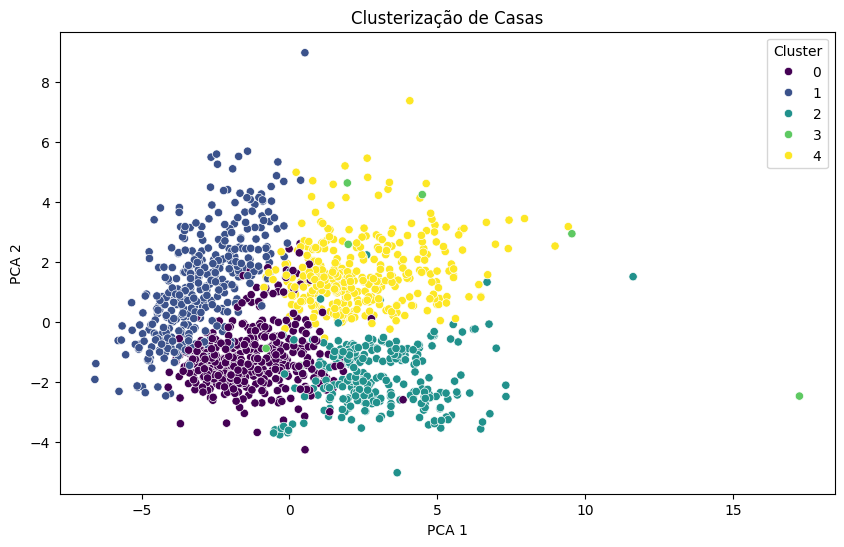

In [ ]:
#Aplicação do K-Means
#Definimos o númeo de clusters
#Usamos K-Means para ajustar o modelo e prever os clusters
#Adicionamos a informação de cluster ao dataframe original
#Utilizamos PCA para reduzir dimensionalidade dos dados preparados

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

data_clusters = kmeans.fit_predict(data_prepared)

df_house_train['Cluster'] = data_clusters

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_prepared.toarray() if hasattr(data_prepared, 'toarray') else data_prepared)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_reduced[:, 0], y=data_reduced[:, 1], hue=data_clusters, palette='viridis')
plt.title('Clusterização de Casas')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#Avaliação modo de clusterirazação (Precision, Recall e F1-Score)
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

np.random.seed(0)
df_house_train['TrueLabels'] = np.random.choice(n_clusters, len(df_house_train))

label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(df_house_train['TrueLabels'])

cluster_to_true_label = {}

for cluster in range(n_clusters):
    mask = df_house_train['Cluster'] == cluster
    most_common_label = df_house_train.loc[mask, 'TrueLabels'].mode()
    if not most_common_label.empty:
        cluster_to_true_label[cluster] = most_common_label.values[0]

predicted_labels = df_house_train['Cluster'].map(cluster_to_true_label)

precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')


print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print(f"Confusion Matrix:\n{conf_matrix}")

Precision: 0.1843683322308058
Recall: 0.227906164221384
F1-Score: 0.2024603383579579
Confusion Matrix:
[[80  0 86 63 69]
 [62  0 91 55 74]
 [62  0 92 66 59]
 [65  0 91 78 81]
 [71  0 78 53 84]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Redução de dimensionalidade
#Utilizamos 'simpleimputer' para tratar valores ausentes
#Aplicamos o transformador para obter dados preparados e verificarmos a sua forma
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


print(df_house_train.head())
print(df_house_train.info())


numerical_features = df_house_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_house_train.select_dtypes(include=['object']).columns.tolist()


if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')
if 'SalePrice' in categorical_features:
    categorical_features.remove('SalePrice')


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores ausentes com o valor mais frequente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar variáveis categóricas
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

data_prepared = preprocessor.fit_transform(df_house_train)

print(data_prepared.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...   NaN         NaN       0      2   2008       WD   
1         Lvl    AllPub  ...   NaN         NaN       0      5   2007       WD   
2         Lvl    AllPub  ...   NaN         NaN       0      9   2008       WD   
3         Lvl    AllPub  ...   NaN         NaN       0      2   2006       WD   
4         Lvl    AllPub  ...   NaN         NaN       0     12   2008       WD   

  SaleCondition  SalePrice  Cluster  TrueLabels  
0        Normal   

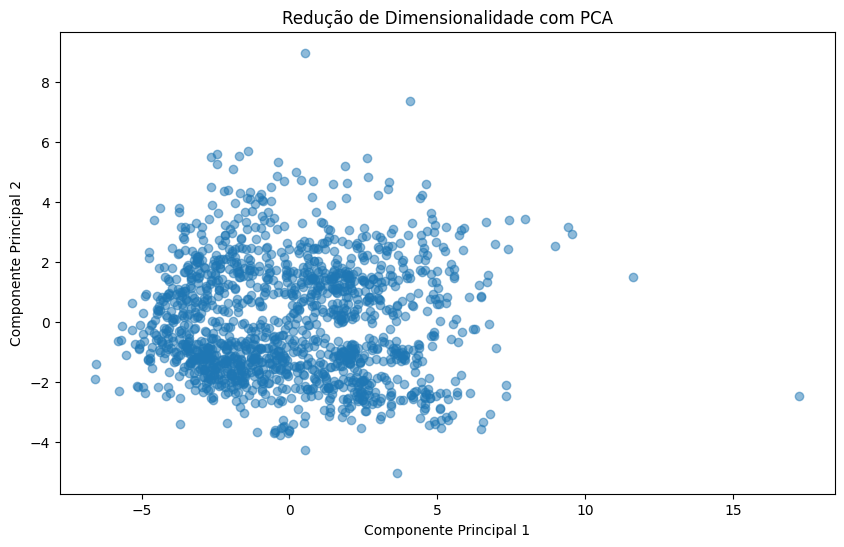

In [ ]:
# Redução de dimensionalidade com PCA
#Utilizamos PCA para reduzir os dados para 2 componentes principais e plotamos os resultados em um gráfico de dispersão
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_prepared.toarray() if hasattr(data_prepared, 'toarray') else data_prepared)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.title('Redução de Dimensionalidade com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

Precision: 0.48830409356725146
Recall: 0.7660550458715596
F1-Score: 0.5964285714285713


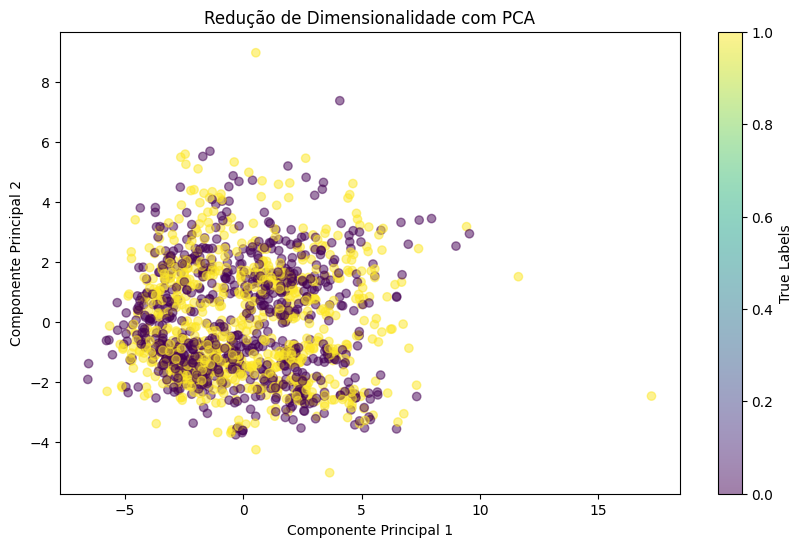

In [ ]:
#Avaliação modo de redução (Precision, Recall e F1-Score)
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Reduzir a dimensionalidade para 2 componentes
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_prepared.toarray() if hasattr(data_prepared, 'toarray') else data_prepared)

np.random.seed(0)
df_house_train['TrueLabels'] = np.random.choice([0, 1], len(df_house_train))

X_train, X_test, y_train, y_test = train_test_split(data_pca, df_house_train['TrueLabels'], test_size=0.3, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Fazer previsões
y_pred = classifier.predict(X_test)

# Calcular métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotar os dados reduzidos com rótulos verdadeiros para visualização
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_house_train['TrueLabels'], alpha=0.5, cmap='viridis')
plt.title('Redução de Dimensionalidade com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='True Labels')
plt.show()

In [ ]:
#Apriori
#Verificamos se as colunas categóricas foram identificadas corretamente.
#Utilizamos SimpleImputer para tratar valores ausentes (valor mais frequente para categóricas).
#Utilizamos OneHotEncoder para codificar as colunas categóricas em formato binário.
#Criamos um dataframe categorical_df com os dados categóricos processados.

selected_categorical_features = ['MSZoning', 'Street', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Foundation', 'Heating', 'CentralAir']


df_selected = df_house_train[selected_categorical_features]


categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])


categorical_data_prepared = categorical_pipeline.fit_transform(df_selected)


categorical_df = pd.DataFrame(categorical_data_prepared, columns=categorical_pipeline.named_steps['onehot'].get_feature_names_out(selected_categorical_features))

print(categorical_df.head())
print(categorical_df.shape)

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0.0          0.0          0.0          1.0          0.0   
1               0.0          0.0          0.0          1.0          0.0   
2               0.0          0.0          0.0          1.0          0.0   
3               0.0          0.0          0.0          1.0          0.0   
4               0.0          0.0          0.0          1.0          0.0   

   Street_Grvl  Street_Pave  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0          0.0          1.0                   0.0                   0.0   
1          0.0          1.0                   0.0                   0.0   
2          0.0          1.0                   0.0                   0.0   
3          0.0          1.0                   0.0                   0.0   
4          0.0          1.0                   0.0                   0.0   

   Neighborhood_BrDale  ...  Foundation_Stone  Foundation_Wood  Heating_Floor  \
0                

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#Utilizamos a função apriori da biblioteca mlxtend para identificar conjuntos frequentes de itens com um suporte mínimo de 5%.
#Geramos regras de associação usando a função association_rules e filtramos as regras com um lift mínimo de 1.0.
#Exibimos e ordenamos as regras de associação para visualizar as mais interessantes.

from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(categorical_df, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print(rules)

rules = rules.sort_values(by='lift', ascending=False)
print(rules.head())

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                antecedents  \
0             (Street_Pave)   
1             (MSZoning_RL)   
2      (Neighborhood_NAmes)   
3             (MSZoning_RL)   
4           (BldgType_1Fam)   
...                     ...   
29241        (Heating_GasA)   
29242         (Street_Pave)   
29243        (CentralAir_Y)   
29244    (Foundation_PConc)   
29245       (BldgType_1Fam)   

                                             consequents  antecedent support  \
0                                          (MSZoning_RL)            0.995890   
1                                          (Street_Pave)            0.788356   
2                                          (MSZoning_RL)            0.154110   
3                                   (Neighborhood_NAmes)            0.788356   
4                                          (MSZoning_RL)            0.835616   
...                                                  ...                 ...   
29241  (Exterior1st_VinylSd, RoofStyle_Gable, HouseSt...           

In [ ]:
# Local Outlier Factor
#Verificamos se as colunas numéricas e categóricas foram identificadas corretamente.
#Utilizamos SimpleImputer para tratar valores ausentes (média para variáveis numéricas e valor mais frequente para categóricas).
#Utilizamos StandardScaler para escalar as colunas numéricas e OneHotEncoder para codificar as colunas categóricas.
#Aplicamos o transformador para obter os dados preparados e verificamos sua forma.

print(df_house_train.head())
print(df_house_train.info())


numerical_features = df_house_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_house_train.select_dtypes(include=['object']).columns.tolist()

if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')
if 'SalePrice' in categorical_features:
    categorical_features.remove('SalePrice')


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores ausentes com a média
    ('scaler', StandardScaler())  # Escalar as variáveis numéricas
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])


data_prepared = preprocessor.fit_transform(df_house_train)

print(data_prepared.shape)

         Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0  0.000000    0.235294         3     0.150685  0.033420       1         3   
1  0.000685    0.000000         3     0.202055  0.038795       1         3   
2  0.001371    0.235294         3     0.160959  0.046507       1         0   
3  0.002056    0.294118         3     0.133562  0.038561       1         0   
4  0.002742    0.235294         3     0.215753  0.060576       1         0   

   LandContour  Utilities  LotConfig  ...  PoolArea  MiscVal    MoSold  \
0            3          0          4  ...       0.0      0.0  0.090909   
1            3          0          2  ...       0.0      0.0  0.363636   
2            3          0          4  ...       0.0      0.0  0.727273   
3            3          0          0  ...       0.0      0.0  0.090909   
4            3          0          2  ...       0.0      0.0  1.000000   

   YrSold  SaleType  SaleCondition  SalePrice  price_reg  price_binary  \
0    0.50   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Número de outliers detectados: 73


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


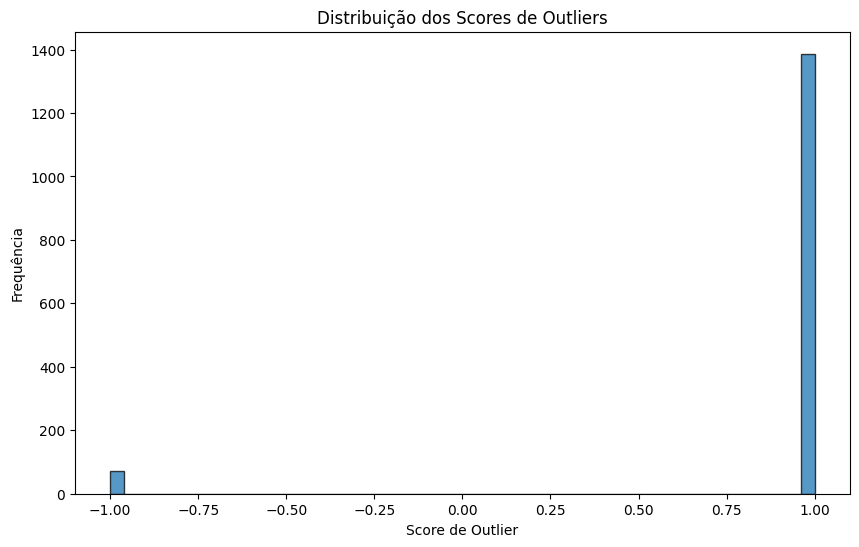

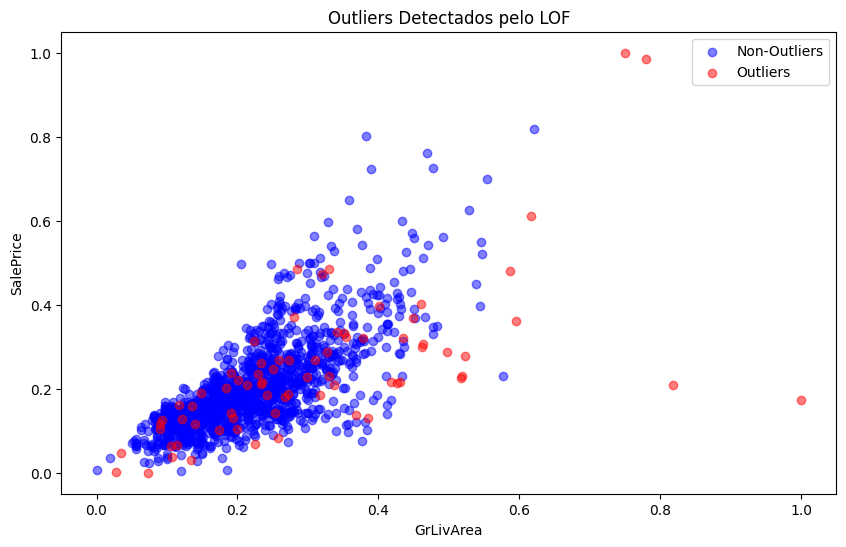

In [ ]:
#Usamos LocalOutlierFactor para detectar outliers no dataset. Definimos n_neighbors=20 e contamination=0.05 (assumindo que 5% dos dados são outliers).
#Adicionamos a informação de outliers ao dataframe original (df_house_train).
#Plotamos a distribuição dos scores de outliers.
#Visualizamos os outliers identificados em um gráfico de dispersão comparando GrLivArea e SalePrice

from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_scores = lof.fit_predict(data_prepared)

df_house_train['Outlier'] = outlier_scores

print("Número de outliers detectados:", np.sum(outlier_scores == -1))

plt.figure(figsize=(10, 6))
plt.hist(outlier_scores, bins=50, alpha=0.75, edgecolor='black')
plt.title('Distribuição dos Scores de Outliers')
plt.xlabel('Score de Outlier')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(10, 6))
outliers = df_house_train[outlier_scores == -1]
non_outliers = df_house_train[outlier_scores != -1]
plt.scatter(non_outliers['GrLivArea'], non_outliers['SalePrice'], c='blue', label='Non-Outliers', alpha=0.5)
plt.scatter(outliers['GrLivArea'], outliers['SalePrice'], c='red', label='Outliers', alpha=0.5)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Outliers Detectados pelo LOF')
plt.legend()
plt.show()